## Importing dataframe and libraries

In [82]:
# Importing libraries

import pandas as pd
import numpy as np
import os

In [83]:
# Establishing project path

path = r'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [84]:
path

'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [85]:
# Importing "global_startup_cleaned.pkl" dataframe

global_startup_cleaned = pd.read_pickle(os.path.join(path, '02_data', 'prepared_data', 'global_startup_cleaned.pkl'))

In [86]:
global_startup_cleaned.head(5)

,startup_name,founded_year,country,industry,funding_stage,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,acquired,ipo,customers_millions,tech_stack,social_media_followers
0,Startup_1,2009-01-01,Canada,Healthcare,Series A,269.0,3047.0,104.0,46.11,5.0,No,No,43.0,"Java, Spring",4158814.0
1,Startup_2,2004-01-01,UK,Healthcare,IPO,40.0,630.0,431.0,33.04,1.0,No,Yes,64.0,"Node.js, React",4063014.0
2,Startup_3,2018-01-01,USA,Healthcare,Seed,399.0,2475.0,375.0,15.79,8.0,No,No,74.0,"PHP, Laravel",3449855.0
3,Startup_4,2014-01-01,France,Tech,Seed,404.0,1011.0,907.0,17.12,7.0,Yes,Yes,26.0,"Python, AI",630421.0
4,Startup_5,2006-01-01,Japan,Energy,Series C,419.0,3917.0,280.0,4.39,6.0,Yes,Yes,30.0,"Node.js, React",365956.0


In [87]:
# Importing visualization libraries

import matplotlib.pyplot as plt

import seaborn as sns

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
output_notebook()


import plotly.express as px
import plotly.graph_objects as go

Loading BokehJS ...

## Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables

In [88]:
# Creating new dataframe including just suitable columns

numerical_columns_global_startup_dataframe = global_startup_cleaned[
    ['total_funding_millions', 'number_employees', 'annual_revenue_millions', 'valuation_billions', 'success_score', 'customers_millions', 'social_media_followers']]

In [89]:
correlation_global_startup = numerical_columns_global_startup_dataframe.corr()

In [90]:
correlation_global_startup

,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,customers_millions,social_media_followers
total_funding_millions,1.000000,0.002285,0.008993,-0.014328,0.011716,0.007392,0.001015
number_employees,0.002285,1.000000,0.010594,-0.000296,-0.013319,-0.005308,-0.000710
annual_revenue_millions,0.008993,0.010594,1.000000,-0.010944,-0.004188,0.012389,-0.018128
valuation_billions,-0.014328,-0.000296,-0.010944,1.000000,0.009130,0.001300,0.013219
success_score,0.011716,-0.013319,-0.004188,0.009130,1.000000,-0.020083,0.014993
customers_millions,0.007392,-0.005308,0.012389,0.001300,-0.020083,1.000000,-0.009310
social_media_followers,0.001015,-0.000710,-0.018128,0.013219,0.014993,-0.009310,1.000000


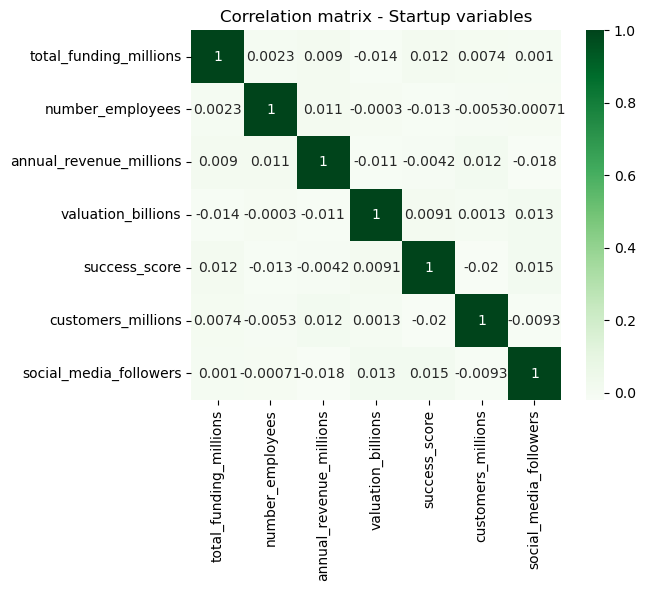

In [91]:
# Numerical variables heatmap

plt.figure
sns.heatmap(
    correlation_global_startup, 
    annot=True, 
    cmap="Greens",
    cbar=True,
    square=True,)
plt.title("Correlation matrix - Startup variables")
plt.show()

The dataset shows very weak linear relationships between the variables. For instance, "Success Score" isn't linearly explained by funding, revenue, valuation, or any of the other variables. Therefore, I need to explore some other non-linear relationships in order to understand better the success of the companies. For instance, the relation between funding and industry or country, funding stage and employees, etc.

## Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell

None of the variables showed correlations, but using the hypothesis, let's explore what the distribution looks like. 

Finding the key drivers of startups' success:
- What is the relationship between funding received and valuation? -> total_founding vs. valuation
- How does total funding influence success? -> total_founding vs. success score

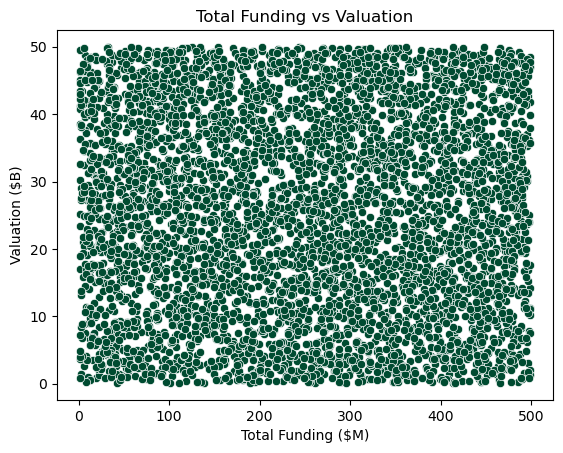

In [92]:
# Scatterplot exploring Total Funding and Valuation correlation

plt.figure
sns.scatterplot(
    data=numerical_columns_global_startup_dataframe,
    x="total_funding_millions",
    y="valuation_billions",
    color="#004b31",
)
plt.title("Total Funding vs Valuation")
plt.xlabel("Total Funding ($M)")
plt.ylabel("Valuation ($B)")
plt.show()

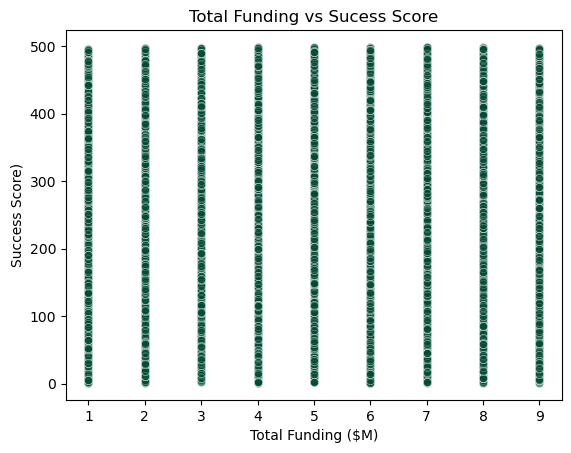

In [93]:
# Scatterplot exploring Total Funding and Success Score

plt.figure
sns.scatterplot(
    data=numerical_columns_global_startup_dataframe,
    x="success_score",
    y="total_funding_millions",
    color="#004b31",
    alpha=0.6
)
plt.title("Total Funding vs Sucess Score")
plt.xlabel("Total Funding ($M)")
plt.ylabel("Success Score)")
plt.show()

I don't see any relation between founding capital and success overall. As next steps, I need to explore it by industry and by country to see in a clearer way if there is any correalation.

## Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why

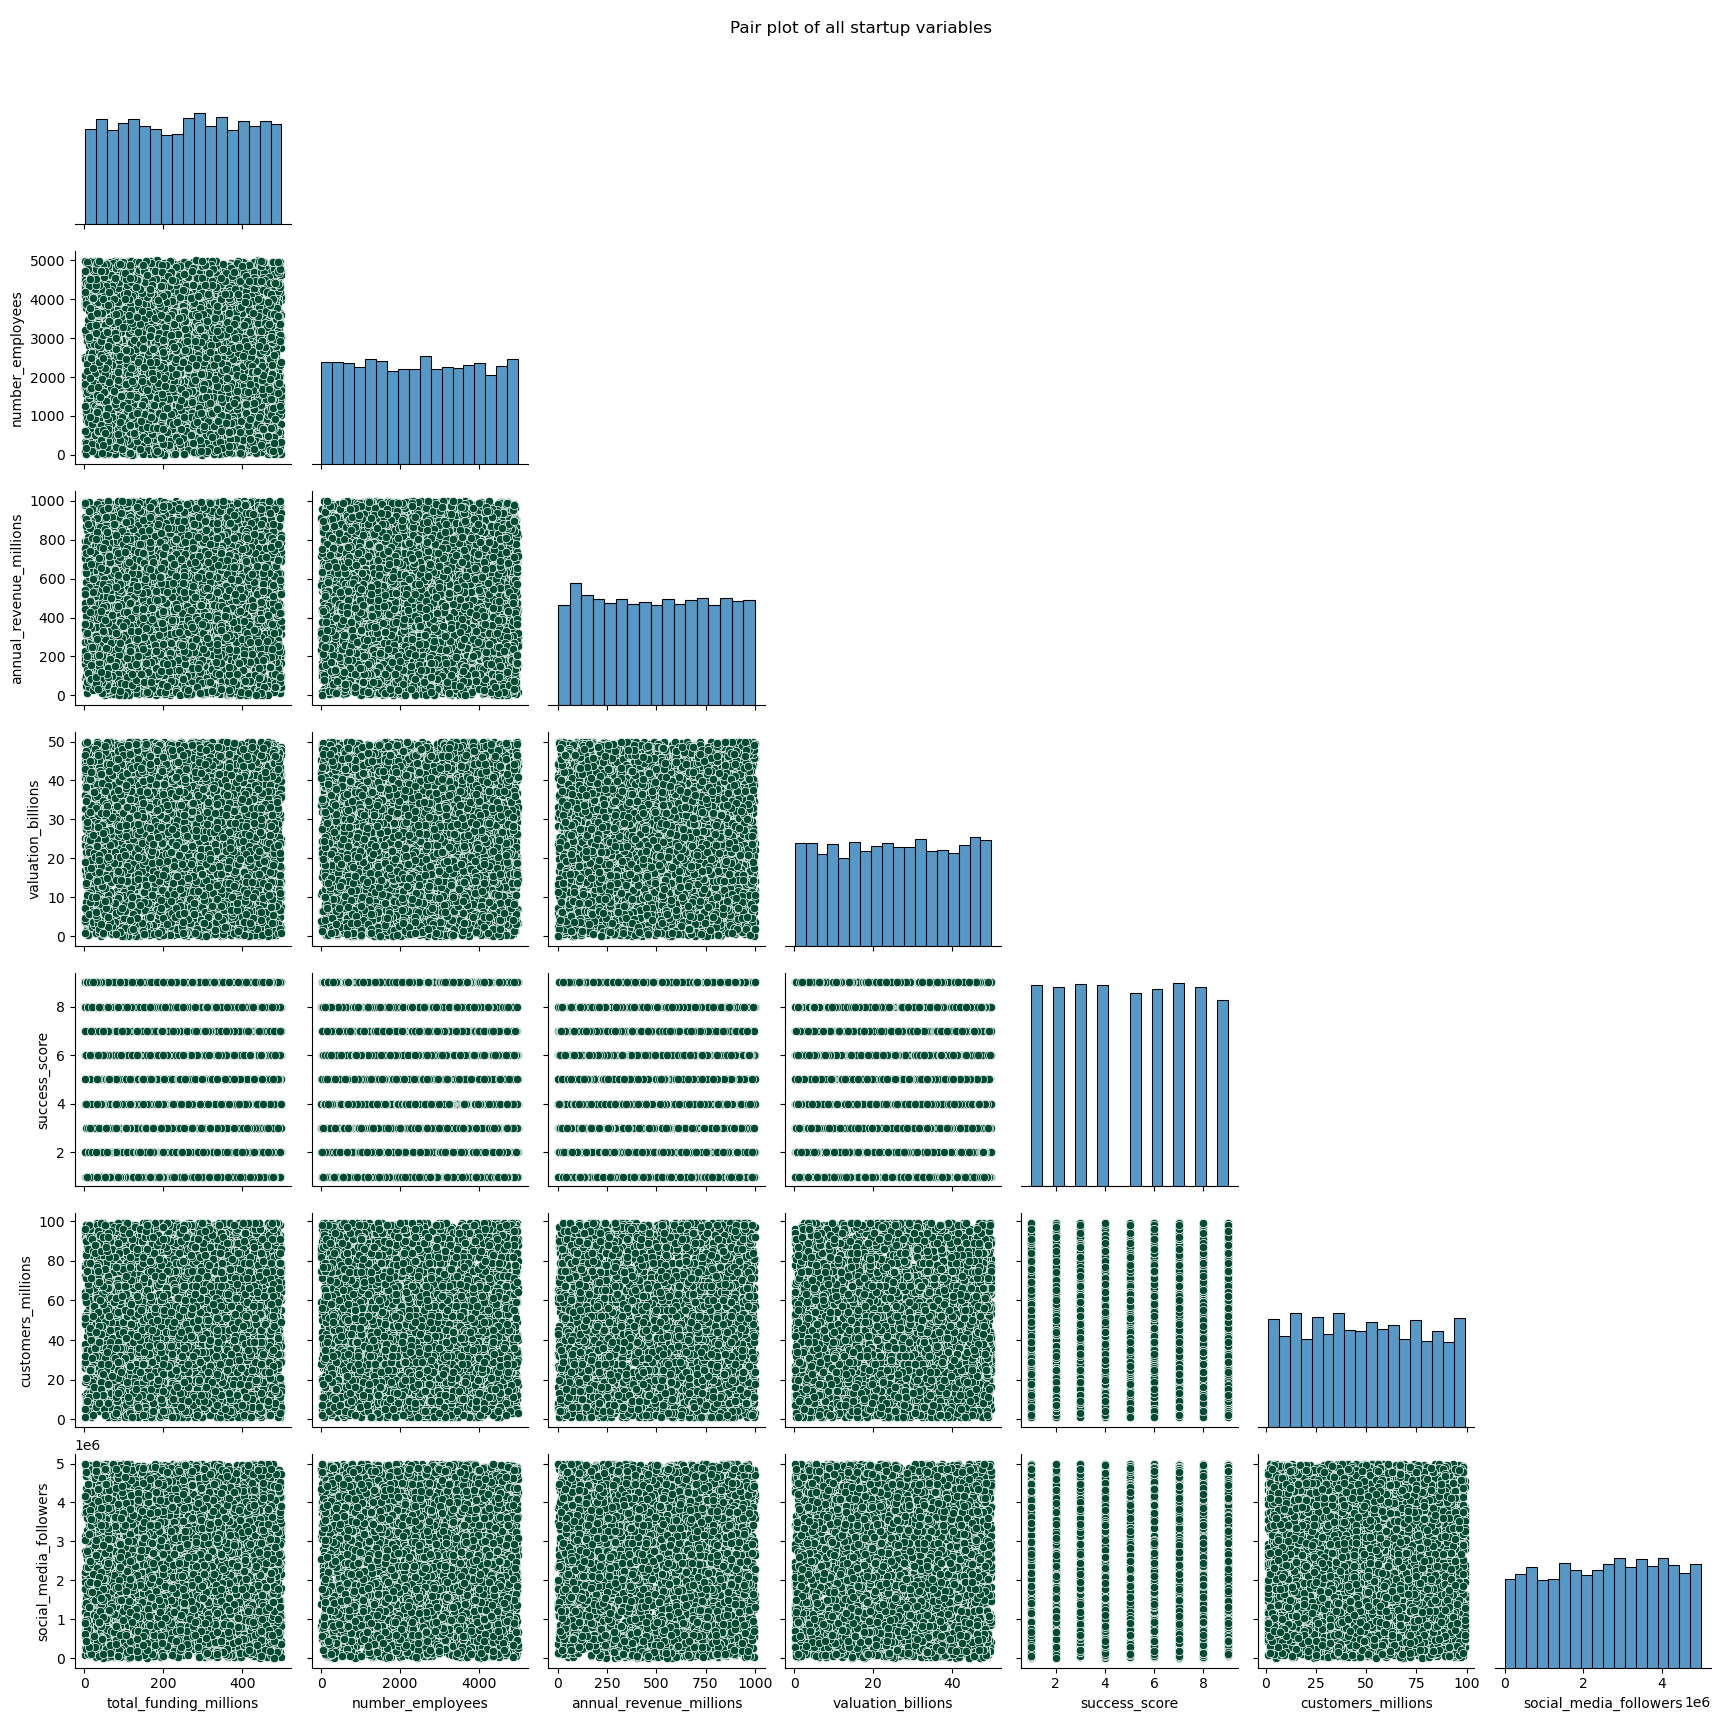

In [94]:
# Pair plot w/ the entire dataframe

sns.pairplot(
    numerical_columns_global_startup_dataframe,
    corner=True,
    plot_kws={'color': '#004b31'})
plt.suptitle("Pair plot of all startup variables")
plt.show()

As we saw earlier, apparently, there is no correlation between the numerical values. Therefore, I need to explore some other categorical relations as next steps to answer the questions and hypothesis.

## Create a categorical plot and interpret the results. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far

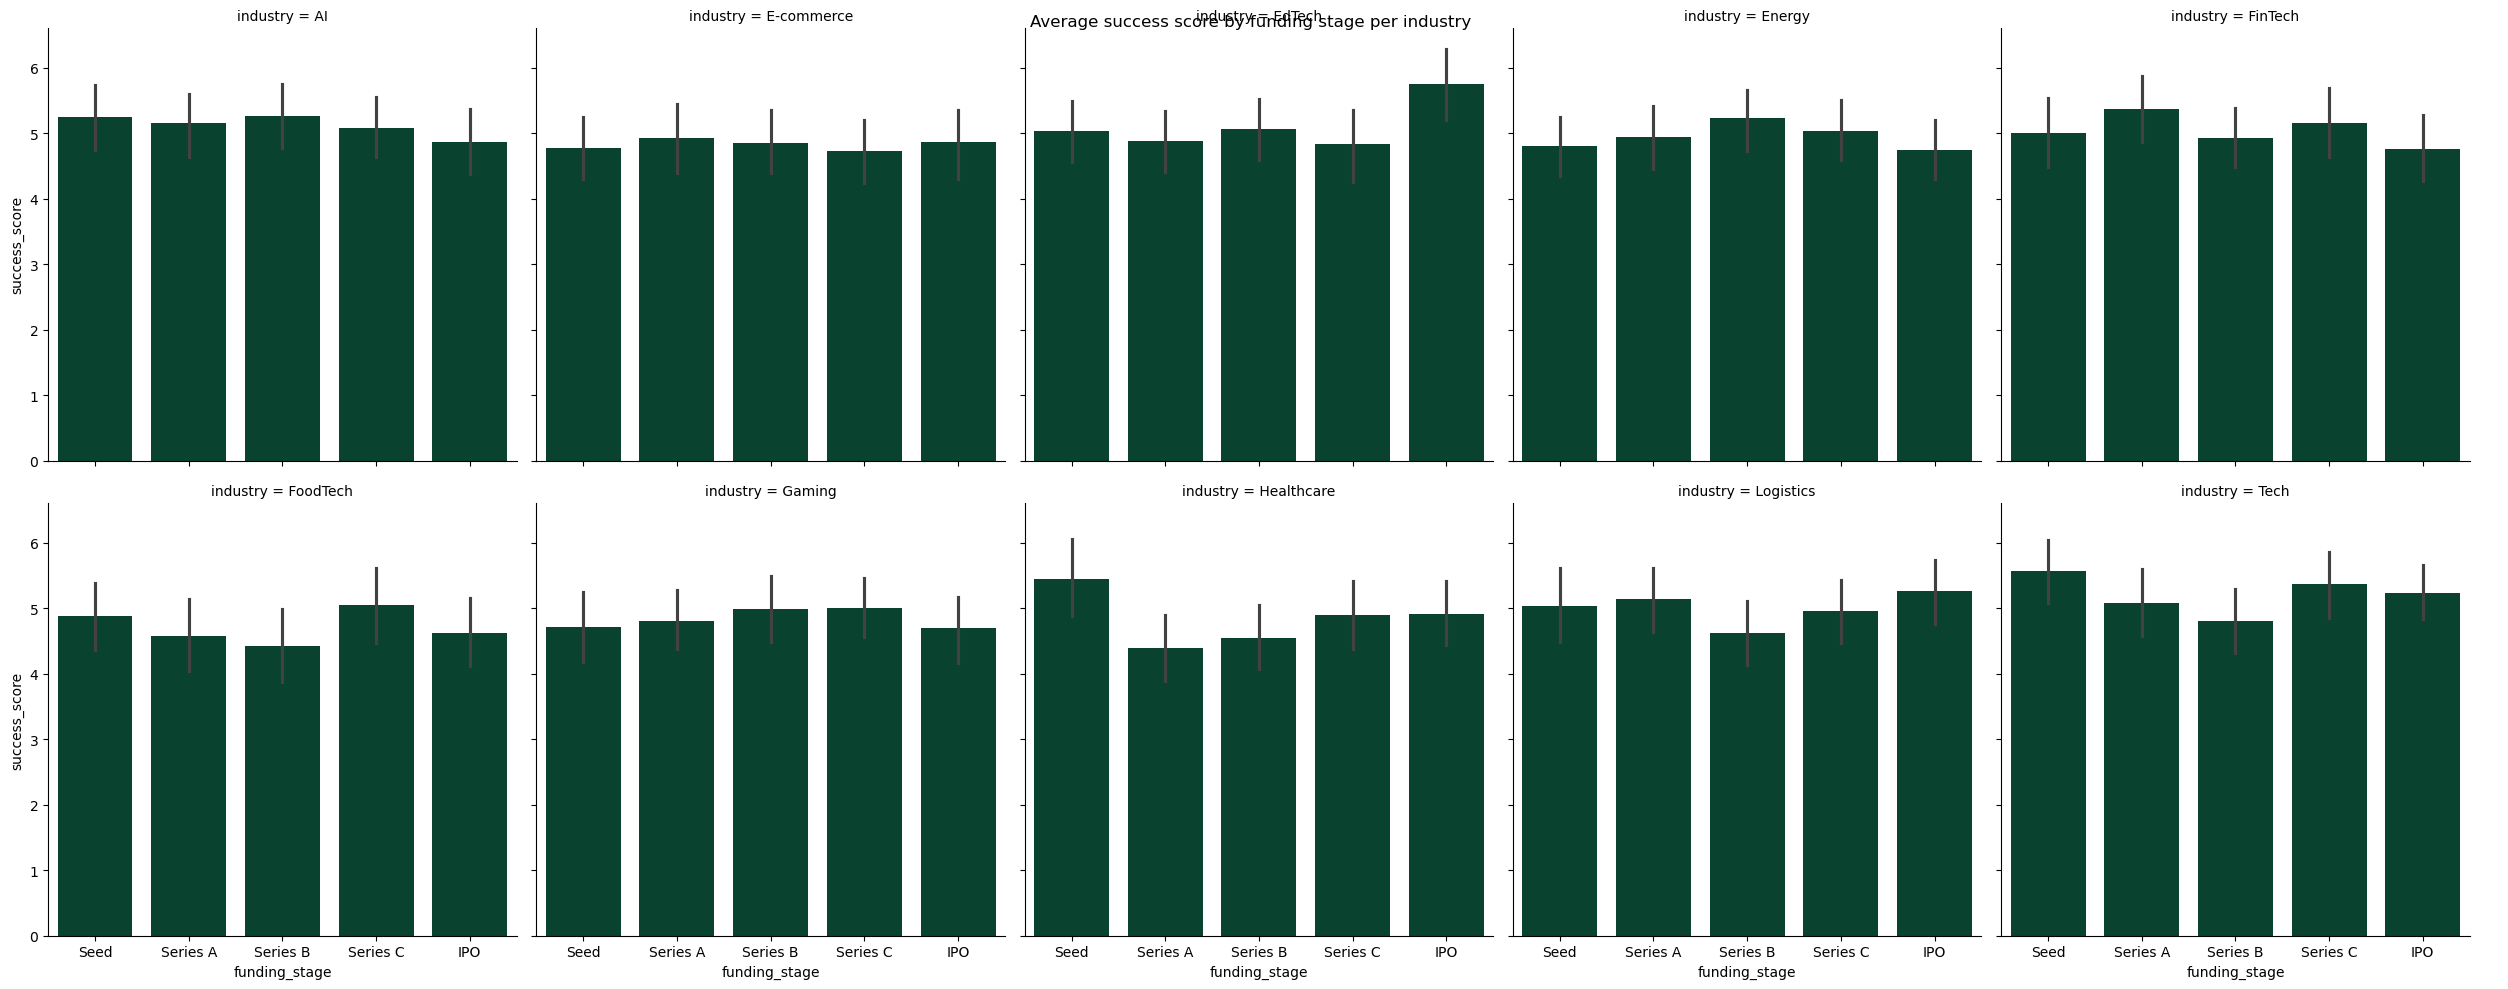

In [95]:
# Categorical plot for funding stage and success score (by industry), ordering the funding stages from the first to the last part of the funding process

g = sns.catplot(
    data=global_startup_cleaned,
    x="funding_stage",
    y="success_score",
    kind="bar",
    estimator="mean",
    color="#004b31",      
    col="industry",
    col_wrap=5,
    order=["Seed", "Series A", "Series B", "Series C", "IPO"],)
plt.suptitle("Average success score by funding stage per industry")
plt.show()

/var/folders/32/qqkdf8qx2w189kqpjp4rlrv40000gn/T/ipykernel_892/3374975227.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



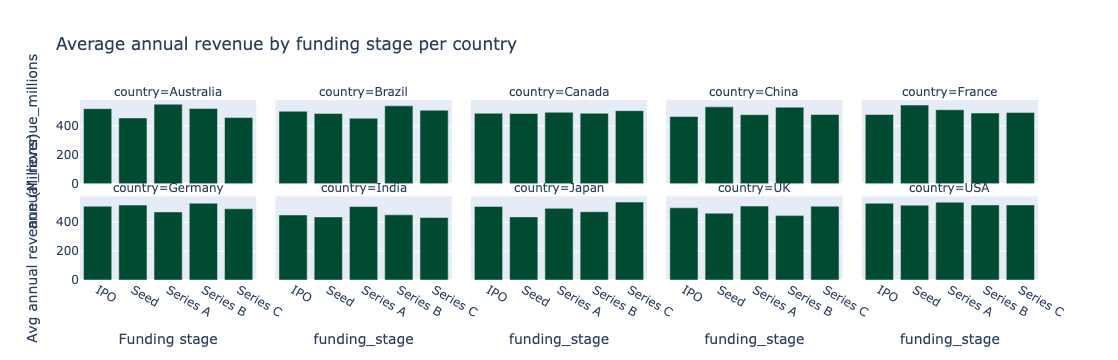

In [96]:
# Categorical plot for Funding Stage and Annual Revenue (by country)

country_founding_stage_grouped = (global_startup_cleaned.groupby(["country", "funding_stage"], as_index=False)["annual_revenue_millions"].mean())

fig = px.bar(
    country_founding_stage_grouped,
    x="funding_stage",
    y="annual_revenue_millions",
    color_discrete_sequence=["#004b31"],
    facet_col="country",
    facet_col_wrap=5,
    title="Average annual revenue by funding stage per country")

fig.update_layout(
    xaxis_title="Funding stage",
    yaxis_title="Avg annual revenue (Millions)")
fig.show()

## Add any new questions that may have arisen based on the early findings in your visual exploration. Define any hypotheses that you can at this point. You’ll be testing these later on

In [97]:
global_startup_cleaned.head(5)

,startup_name,founded_year,country,industry,funding_stage,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,acquired,ipo,customers_millions,tech_stack,social_media_followers
0,Startup_1,2009-01-01,Canada,Healthcare,Series A,269.0,3047.0,104.0,46.11,5.0,No,No,43.0,"Java, Spring",4158814.0
1,Startup_2,2004-01-01,UK,Healthcare,IPO,40.0,630.0,431.0,33.04,1.0,No,Yes,64.0,"Node.js, React",4063014.0
2,Startup_3,2018-01-01,USA,Healthcare,Seed,399.0,2475.0,375.0,15.79,8.0,No,No,74.0,"PHP, Laravel",3449855.0
3,Startup_4,2014-01-01,France,Tech,Seed,404.0,1011.0,907.0,17.12,7.0,Yes,Yes,26.0,"Python, AI",630421.0
4,Startup_5,2006-01-01,Japan,Energy,Series C,419.0,3917.0,280.0,4.39,6.0,Yes,Yes,30.0,"Node.js, React",365956.0


Knowing that there is no correlation between the numerical values, I need to evaluate and analyze the data grouping values, exploring, for instance, the startup ecosystem by country, industry funding stage, etc.

In the following steps, I would like to test the following data:
- Country analysis: Behaviour on founding; Which countries' companies receive the most funding? What industries are more popular in terms of founding by country? 
- Industry analysis: Overall, do some industries receive more funding than others?
- Funding stage: Overall, what are the stages where the companies receive more funding?

Once I have more clarity on these questions, I can start testing the following hypothesis:
- Companies from specific industries and countries have a higher probability of going public (IPO). 
- As a company grows following the founding stages in order (Seed -> Series A -> Series B -> Series C -> IPO), there is a growth in terms of funding, employees, annual revenue, and valuation.
- Number of customers influences the act of being acquired.
- Industry has a influence on Social Media following.
- Different industries use different tech stacks.
- Different industries have different needs in terms of number of employees.